In [4]:
import re
import numpy as np
from matplotlib import pyplot as plt

In [10]:
# считываем собранные с датчика данные из файла

all_lines = []
with open('gyro_zero_ofs.txt', "r") as f:
    all_lines = f.readlines() # readlines() возвращает список строк файла
N = 13000 # кол-во точек, которые будем использовать
data_lines = []
for i in range(1, N + 1):
    data_lines.append(re.split('\s+', all_lines[i]))
    data_lines[i - 1] = data_lines[i - 1][:-1]
    print(data_lines[i - 1])

['64', '177', '-206']
['55', '180', '-209']
['52', '183', '-202']
['66', '184', '-213']
['52', '170', '-212']
['62', '179', '-212']
['68', '174', '-207']
['67', '170', '-200']
['55', '188', '-218']
['64', '171', '-226']
['63', '181', '-214']
['63', '180', '-218']
['52', '186', '-211']
['49', '182', '-216']
['62', '185', '-212']
['67', '182', '-212']
['72', '170', '-199']
['59', '182', '-205']
['67', '178', '-213']
['64', '192', '-219']
['51', '182', '-210']
['61', '181', '-210']
['62', '192', '-215']
['55', '181', '-211']
['35', '185', '-213']
['64', '178', '-209']
['59', '184', '-212']
['63', '181', '-207']
['52', '182', '-208']
['56', '184', '-200']
['52', '171', '-211']
['59', '180', '-218']
['53', '174', '-202']
['54', '181', '-209']
['64', '179', '-208']
['65', '185', '-199']
['56', '186', '-210']
['66', '170', '-207']
['60', '188', '-203']
['69', '174', '-201']
['65', '186', '-214']
['64', '182', '-204']
['69', '181', '-205']
['62', '195', '-205']
['57', '185', '-216']
['68', '19

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_4722/3860877835.py:9: SyntaxWarning: invalid escape sequence '\s'
  data_lines.append(re.split('\s+', all_lines[i]))


In [11]:
# преобразуем данные к типу float

points = []
for i in range(N):
    points.append(list(float(value) for value in data_lines[i]))

points = np.array(points)
print(points)

[[  64.  177. -206.]
 [  55.  180. -209.]
 [  52.  183. -202.]
 ...
 [  78.  166. -190.]
 [  76.  175. -182.]
 [  86.  157. -187.]]


Text(0.5, 0, 't, сек')

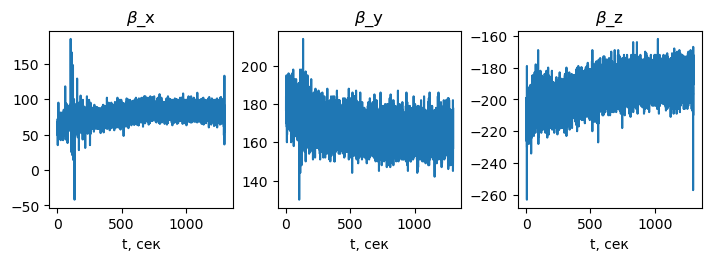

In [43]:
x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

t = np.arange(0, 1300, 0.1)

fig, axs = plt.subplots(ncols=3, figsize=(7, 2.5), layout='constrained')

axs[0].plot(t, x)
axs[0].set_title(r'$\beta$_x')
axs[0].set_xlabel('t, сек')

axs[1].plot(t, y)
axs[1].set_title(r'$\beta$_y')
axs[1].set_xlabel('t, сек')

axs[2].plot(t, z)
axs[2].set_title(r'$\beta$_z')
axs[2].set_xlabel('t, сек')

In [ ]:
# для уменьшения шума измерений выходные данные необходимо обработать с помощью фильтра Калмана

In [38]:
all_lines = []
with open('temperature.txt', "r") as f:
    all_lines = f.readlines() # readlines() возвращает список строк файла
N = 26000
data_lines = []
for i in range(1, N, 2):
    data_lines.append(all_lines[i][:-1])

print(data_lines)

['7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '8', '7', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9',

In [40]:
temp = []
N = 13000
for i in range(N):
    temp.append(float(data_lines[i]))

temp = np.array(temp)
print(temp)

[ 7.  7.  7. ... 26. 26. 26.]


Text(0.5, 0, 't, $\\circ$c')

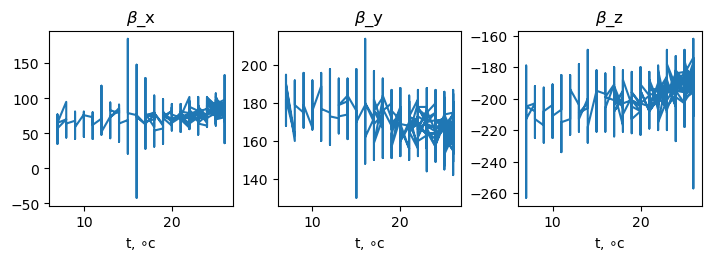

In [45]:
fig, axs = plt.subplots(ncols=3, figsize=(7, 2.5), layout='constrained')

axs[0].plot(temp, x)
axs[0].set_title(r'$\beta$_x')
axs[0].set_xlabel(r't, $\circ$c')

axs[1].plot(temp, y)
axs[1].set_title(r'$\beta$_y')
axs[1].set_xlabel(r't, $\circ$c')

axs[2].plot(temp, z)
axs[2].set_title(r'$\beta$_z')
axs[2].set_xlabel(r't, $\circ$c')

Text(0, 0.5, 't, $\\circ$c')

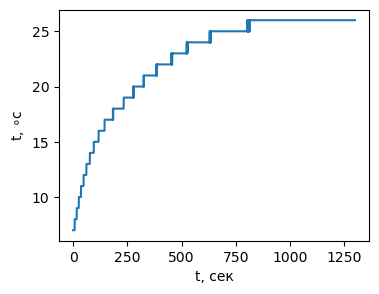

In [46]:
fig, ax = plt.subplots(figsize=(4, 3))

lines = ax.plot(t, temp)
ax.set_xlabel('t, сек')
ax.set_ylabel(r't, $\circ$c')

In [47]:
all_lines = []
with open('gyro_x.txt', "r") as f:
    all_lines = f.readlines() # readlines() возвращает список строк файла
N = 600 # кол-во точек, которые будем использовать
data_lines = []
for i in range(1, N + 1):
    data_lines.append(re.split('\s+', all_lines[i]))
    data_lines[i - 1] = data_lines[i - 1][:-1]
    print(data_lines[i - 1])

['-922', '-32768', '-2114']
['-973', '-32768', '-2117']
['-996', '-32768', '-2230']
['-898', '-32768', '-2148']
['-952', '-32768', '-2095']
['-937', '-32768', '-2144']
['-959', '-32768', '-2158']
['-957', '-32768', '-2105']
['-941', '-32768', '-2076']
['-1006', '-32768', '-2238']
['-973', '-32768', '-2180']
['-926', '-32768', '-2083']
['-902', '-32768', '-2117']
['-968', '-32768', '-2165']
['-954', '-32768', '-2132']
['-950', '-32768', '-2118']
['-1008', '-32768', '-2193']
['-1027', '-32768', '-2166']
['-892', '-32768', '-2044']
['-935', '-32768', '-2130']
['-938', '-32768', '-2152']
['-921', '-32768', '-2115']
['-983', '-32768', '-2104']
['-941', '-32768', '-2186']
['-987', '-32768', '-2192']
['-941', '-32768', '-2082']
['-887', '-32768', '-2108']
['-935', '-32768', '-2136']
['-909', '-32768', '-2099']
['-925', '-32768', '-2028']
['-928', '-32768', '-2144']
['-1029', '-32768', '-2179']
['-854', '-32768', '-2109']
['-909', '-32768', '-2042']
['-952', '-32768', '-2104']
['-945', '-32768

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_4722/1058708746.py:7: SyntaxWarning: invalid escape sequence '\s'
  data_lines.append(re.split('\s+', all_lines[i]))


In [48]:
points = []
for i in range(N):
    points.append(list(float(value) for value in data_lines[i]))

points = np.array(points)
print(points)

[[  -922. -32768.  -2114.]
 [  -973. -32768.  -2117.]
 [  -996. -32768.  -2230.]
 ...
 [  -807. -32768.  -2040.]
 [  -813. -32768.  -2104.]
 [  -880. -32768.  -2183.]]


In [ ]:
x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

